### Predicting heart disease using Scikit Learn Classification models

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

In [9]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import scikit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
# model training & valuation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [7]:
# load data
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


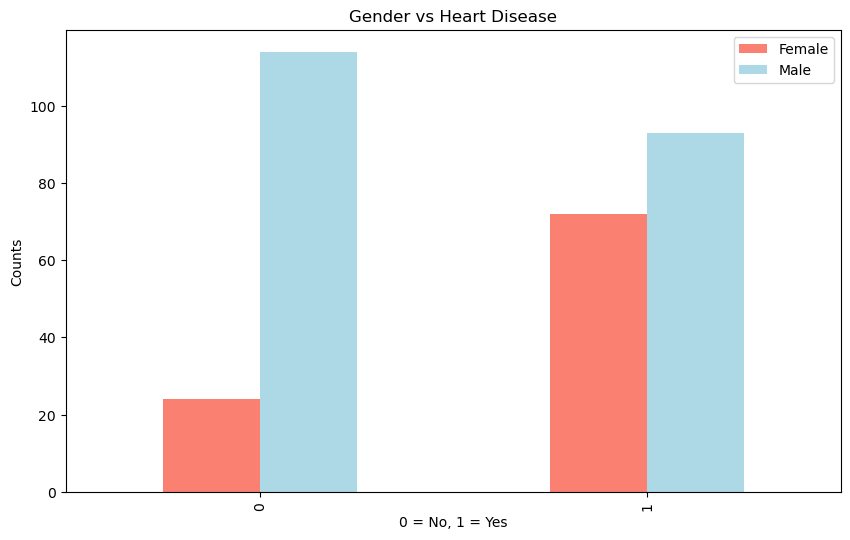

In [19]:
# examine gender vs heart disease
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Gender vs Heart Disease")
plt.xlabel("0 = No, 1 = Yes")
plt.ylabel("Counts")
plt.legend(["Female", "Male"])

plt.show()

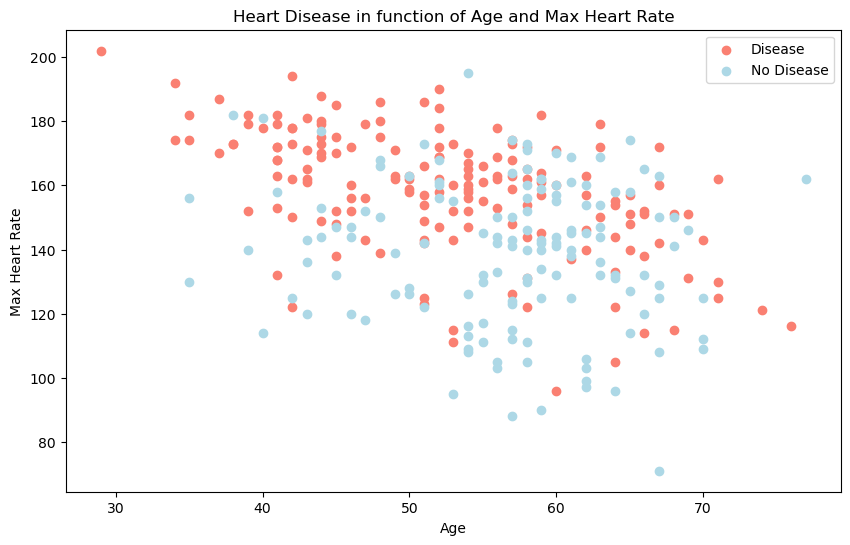

In [22]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

plt.show()

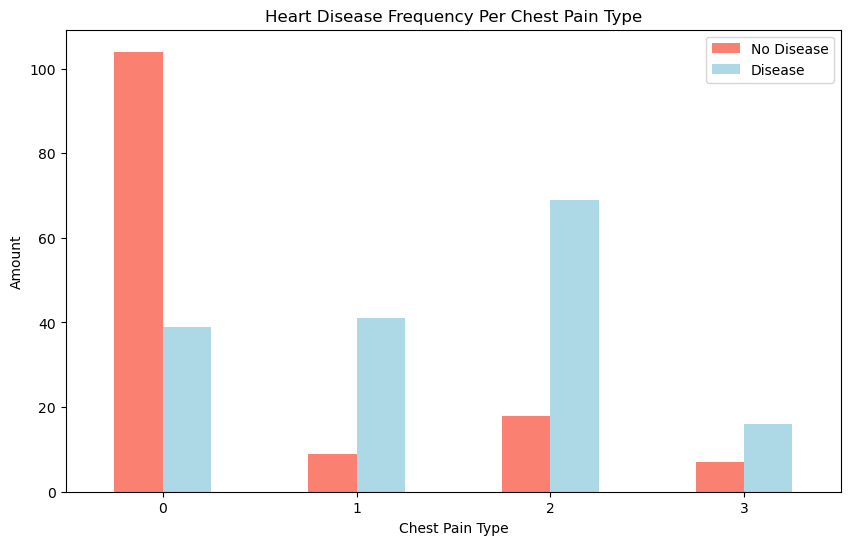

In [23]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

plt.show()

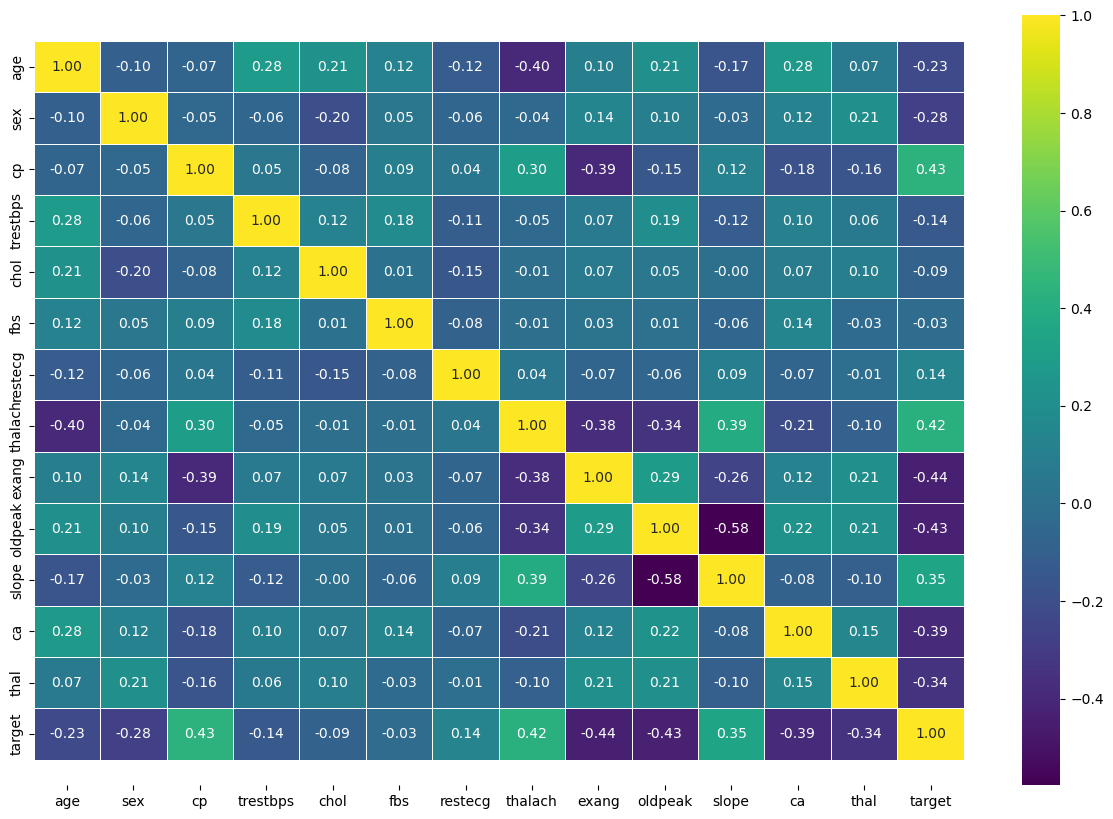

In [24]:
# build a corrolation heatmap
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="viridis"
                 )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [26]:
# split data
X= df.drop("target", axis=1)
y= df["target"]

np.random.seed(69)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# models will be using:
models = {
  "Logistic Regression": LogisticRegression(max_iter=1000),
  "KNN": KNeighborsClassifier(),
  "Random Forest": RandomForestClassifier()
}

In [34]:
# create a function to fit the models and check scores
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(69)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

  return model_scores

In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [36]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

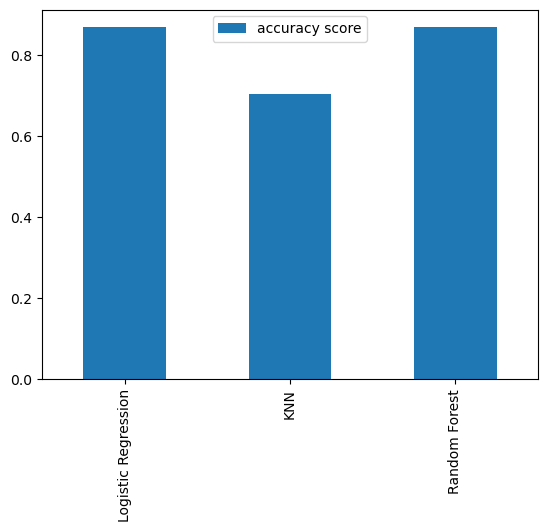

In [40]:
model_compare = pd.DataFrame(model_scores, index=["accuracy score"])
model_compare.T.plot.bar()

plt.show()

In [ ]:
# hyperparameter tuning on KNN model (by loop without cross validation)

train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [43]:
train_scores

[1.0,
 0.8181818181818182,
 0.78099173553719,
 0.768595041322314,
 0.756198347107438,
 0.768595041322314,
 0.71900826446281,
 0.7272727272727273,
 0.71900826446281,
 0.7231404958677686,
 0.7148760330578512,
 0.7148760330578512,
 0.7066115702479339,
 0.6859504132231405,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6776859504132231,
 0.6818181818181818,
 0.6818181818181818]

In [44]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327]

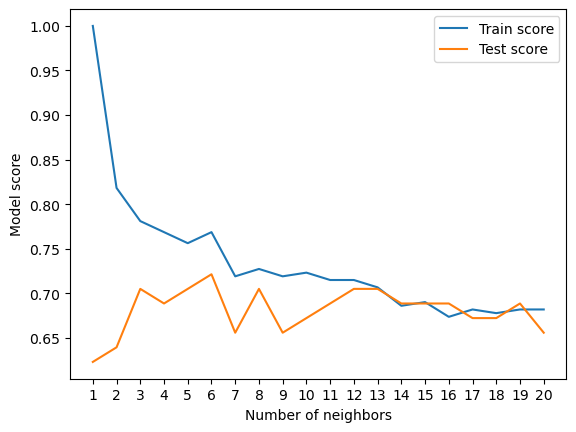

Maximum KNN score on the test data: 72.13%


In [45]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [46]:
# hyperparameter tunning with cross validation using RandomizedSearchCV

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:

np.random.seed(69)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.615848211066026)}

In [49]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [50]:
np.random.seed(69)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True
                            )
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
rs_rf.best_params_

{'n_estimators': np.int64(960),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(5),
 'max_depth': None}

In [52]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [54]:
log_reg_grid = {
  "C": np.logspace(-4, 4, 30),
  "solver": ["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
gs_log_reg.best_params_

{'C': np.float64(0.7278953843983146), 'solver': 'liblinear'}

In [56]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [57]:
y_preds = gs_log_reg.predict(X_test)

In [58]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

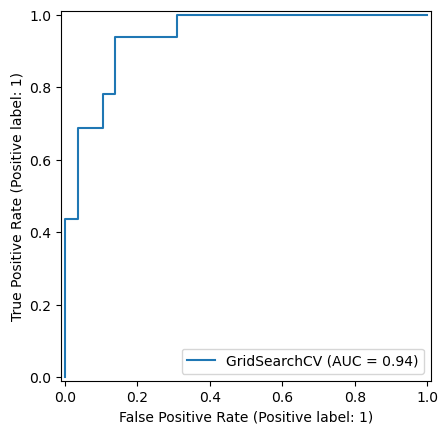

In [62]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

plt.show()

In [64]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False
                   )
  plt.xlabel("Predicted Label")
  plt.ylabel("True label")

  plt.show()

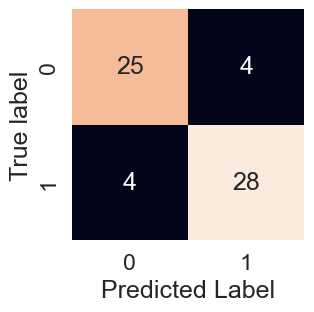

In [65]:
plot_confusion_matrix(y_test, y_preds)

In [66]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [67]:
# Calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.7278953843983146), 'solver': 'liblinear'}

In [68]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.7278953843983146,
                         solver="liblinear")

In [69]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

In [71]:
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

np.float64(0.8182513661202186)

In [72]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

In [73]:
cv_precision_mean=np.mean(cv_precision)
cv_precision_mean

np.float64(0.8138514802551555)

In [74]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

In [75]:
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

np.float64(0.8727272727272727)

In [76]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

In [77]:
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

np.float64(0.8408267145594746)

In [79]:
cv_metrics = pd.DataFrame({
  "Accuracy": [cv_acc_mean],
  "Precision": [cv_precision_mean],
  "Recall": [cv_recall_mean],
  "F1": [cv_f1_mean]
})

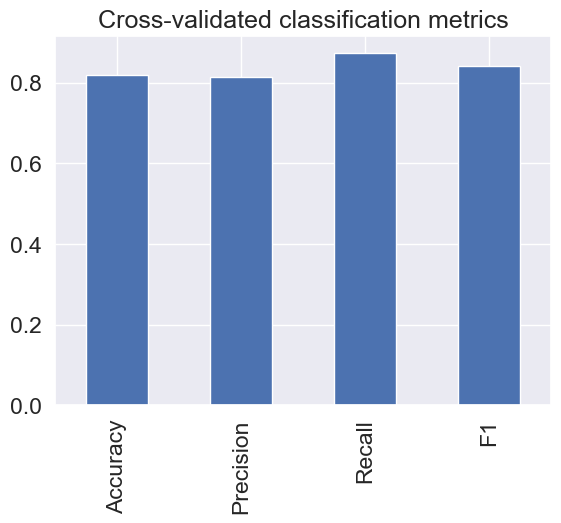

In [83]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)
plt.show()